In [2]:
#I want to predict the 'charges' column based on patient attributes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance = pd.read_csv("insurance.csv")

In [5]:
df=pd.DataFrame(insurance)

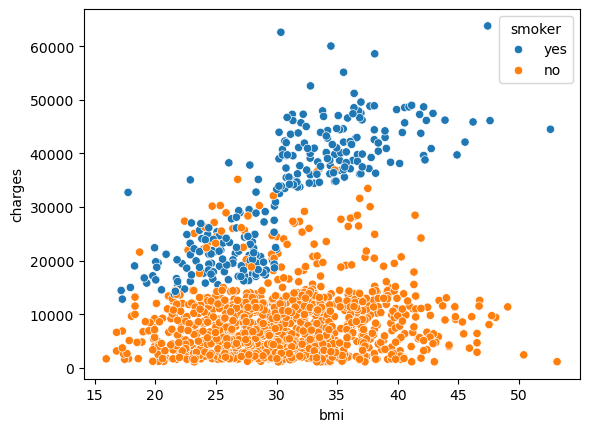

In [6]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')
plt.show()

In [7]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [8]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [9]:
X = df.drop('charges',axis=1)
y = df['charges']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit_transform(X_train)

array([[ 0.92799531,  1.24941097,  0.75674405, ..., -0.58557505,
        -0.60368161, -0.55266566],
       [ 0.21473894,  0.85643216,  0.75674405, ..., -0.58557505,
         1.65650234, -0.55266566],
       [ 0.85666968,  1.43204012, -0.08248869, ..., -0.58557505,
        -0.60368161,  1.80941223],
       ...,
       [ 1.2846235 ,  0.53683114, -0.92172142, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [ 0.92799531,  1.10999318,  0.75674405, ...,  1.70772304,
        -0.60368161, -0.55266566],
       [-0.21321489, -1.77130785, -0.92172142, ..., -0.58557505,
        -0.60368161, -0.55266566]])

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
model1 = LinearRegression()

In [18]:
model1.fit(X_train, y_train)

LinearRegression()

In [19]:
model1_predictions = model1.predict(X_test)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
MAE = mean_absolute_error(y_test, model1_predictions)
RMSE = np.sqrt(mean_squared_error(y_test,model1_predictions))

In [21]:
MAE

29469.52860721839

In [22]:
RMSE

np.float64(31250.632141144102)

In [23]:
coeff_df = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                   Coefficient
smoker_yes        23463.564869
children            494.290617
bmi                 367.188753
age                 241.278787
region_northwest    169.826277
sex_male             52.135464
region_southeast   -592.944987
region_southwest   -880.648087


In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
polyconverter = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
polyfeatures = polyconverter.fit_transform(X)

In [27]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3,random_state=101)

In [28]:
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

In [29]:
X_test_poly_scaled = scaler.fit_transform(X_test_poly)

In [30]:
polymodel = LinearRegression()

In [31]:
polymodel.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [32]:
poly_predictions = polymodel.predict(X_test_poly_scaled)
poly_MAE = mean_absolute_error(y_test, poly_predictions)

In [33]:
poly_MAE

3166.680549778405

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [35]:
base_elastic_model = ElasticNet(max_iter=1000000, tol=0.01)

In [36]:
param_grid = {'alpha':[30,31,32,33],'l1_ratio':[.95,.98,1,1.2,1.5]}


In [37]:
grid_model = GridSearchCV(estimator=base_elastic_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)

In [38]:
grid_model.fit(X_train_poly_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    val

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000, tol=0.01),
             param_grid={'alpha': [30, 31, 32, 33],
                         'l1_ratio': [0.95, 0.98, 1, 1.2, 1.5]},
             scoring='neg_mean_absolute_error', verbose=1)

In [39]:
grid_model.best_params_

{'alpha': 31, 'l1_ratio': 1}

In [40]:
final_predictions = grid_model.predict(X_test_poly_scaled)

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
final_mae = mean_absolute_error(y_test, final_predictions)
final_mae

3104.4938466831063

In [43]:
best_model = grid_model.best_estimator_

In [44]:
coef_series = pd.Series(data=best_model.coef_, index=polyconverter.get_feature_names_out())

In [45]:
coef_series

age                                     -0.000000
bmi                                    468.113439
children                               207.986948
sex_male                                -0.000000
smoker_yes                             -77.675775
region_northwest                       -29.805522
region_southeast                       351.297128
region_southwest                      -192.945768
age^2                                 3333.925989
age bmi                                  0.000000
age children                           348.344053
age sex_male                             0.000000
age smoker_yes                        -466.214603
age region_northwest                    -0.000000
age region_southeast                   977.549880
age region_southwest                   166.218944
bmi^2                                   -0.000000
bmi children                           453.964140
bmi sex_male                          -191.575538
bmi smoker_yes                       18211.958706


In [46]:
coef_series.sort_values()

smoker_yes^2                         -7091.329401
bmi region_southeast                 -1721.349495
age smoker_yes                        -466.214603
sex_male smoker_yes                   -338.393220
children region_southwest             -336.773117
region_southwest^2                    -317.002306
smoker_yes region_southeast           -248.136665
region_southwest                      -192.945768
bmi sex_male                          -191.575538
smoker_yes region_northwest           -123.797832
children smoker_yes                   -107.742812
smoker_yes                             -77.675775
children sex_male                      -59.699379
children region_southeast              -57.023449
region_northwest                       -29.805522
region_northwest^2                     -25.631716
sex_male region_southwest               -1.361679
sex_male^2                              -0.000000
bmi^2                                   -0.000000
bmi region_southwest                    -0.000000


In [47]:
import joblib

# Save the model, the scaler, and the poly_converter 
# You need all three to process new data in the future!
joblib.dump(grid_model, 'insurance_model.pkl')
joblib.dump(scaler, 'insurance_scaler.pkl')
joblib.dump(polyconverter, 'poly_converter.pkl')

['poly_converter.pkl']

Text(0.5, 1.0, 'Residual Plot')

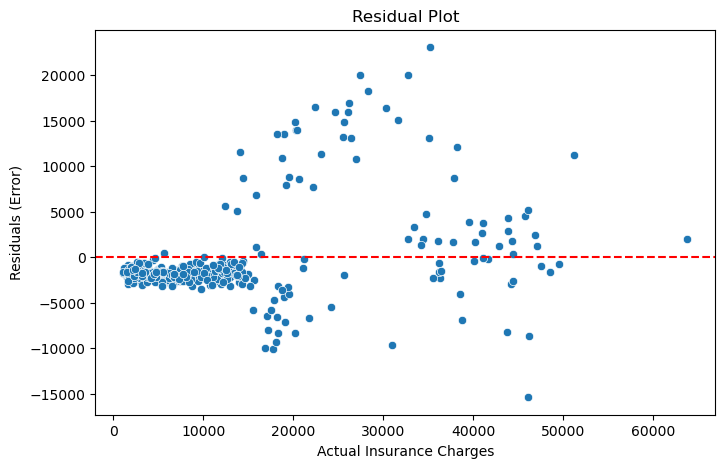

In [48]:
residuals = y_test - final_predictions

# Create the plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Distribution of Residuals')

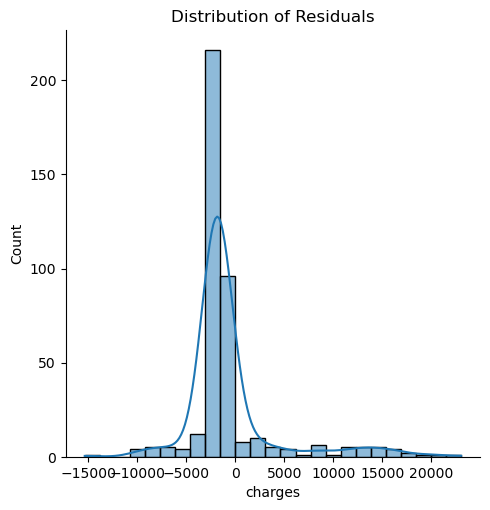

In [49]:
sns.displot(residuals, bins=25, kde=True)
plt.title('Distribution of Residuals')